In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df  = pd.read_csv('data/netflix.csv')

In [24]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [23]:
## Checking for NULL values

df.isnull().sum()

show_id            0
type               0
title              0
director        2621
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [22]:
## Drop the row if the date added column contains NULL values
df = df.dropna(subset='date_added')

In [25]:
## Fill the NULL value columns
df.fillna({'director':'Unknown'},inplace=True)

In [26]:
df.fillna({'cast':'Unknown','country':'Unknown'},inplace=True)

In [27]:
## Drop the row if Rating and Duration column contains NULL values 
df.dropna(subset=['rating','duration'],inplace=True)

Text(0.5, 1.0, 'Content Type Distribution')

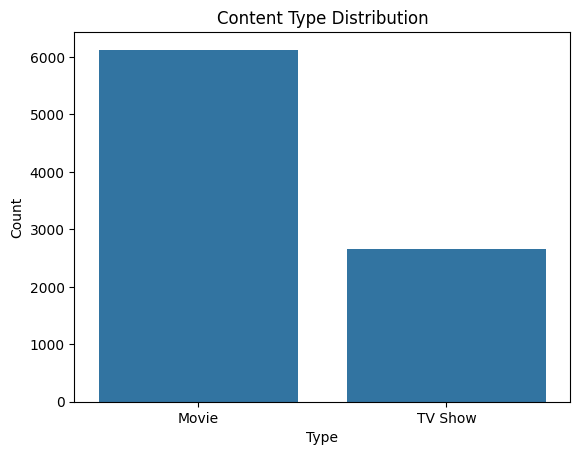

In [39]:
sns.countplot(data=df,x='type')
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Content Type Distribution")

In [52]:
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
df['year_added'] = df['date_added'].dt.year

Text(0.5, 1.0, 'Content added over years ')

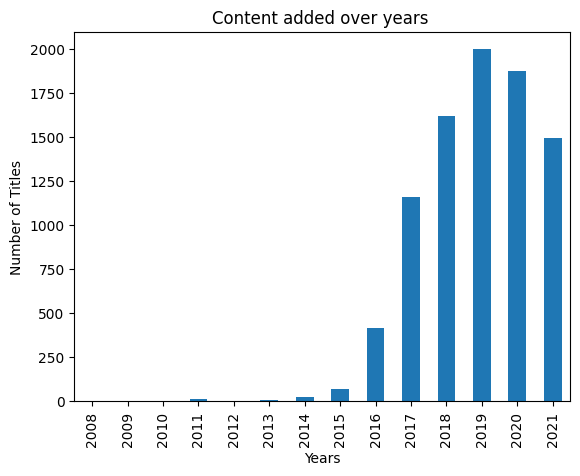

In [60]:
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Years")
plt.ylabel("Number of Titles")
plt.title("Content added over years ")

Text(0.5, 1.0, 'Top Countries by Content')

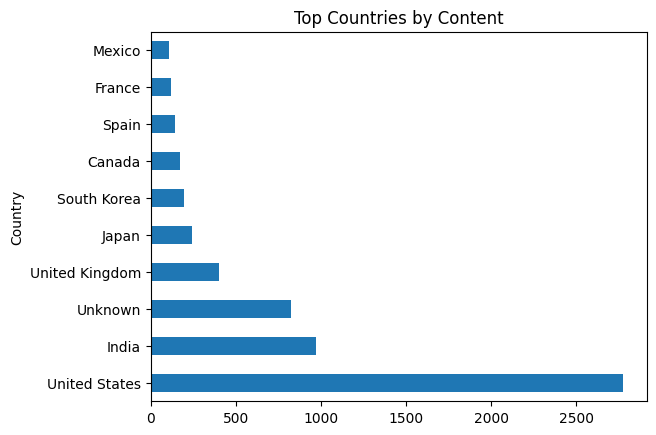

In [63]:
df['country'].value_counts().head(10).plot(kind='barh')
plt.ylabel('Country')
plt.title('Top Countries by Content')

In [ ]:
from collections import Counter

genres = df['listed_in'].dropna().str.split(', ')       ## splitting genres and putting them in list
flatten_genres = [g for sublist in genres for g in sublist]  ## separating each genre from the list of genres
genres_count = Counter(flatten_genres).most_common(10)  ## counting most common genres

[('International Movies', 2752),
 ('Dramas', 2426),
 ('Comedies', 1674),
 ('International TV Shows', 1327),
 ('Documentaries', 869),
 ('Action & Adventure', 859),
 ('Independent Movies', 756),
 ('TV Dramas', 739),
 ('Children & Family Movies', 641),
 ('Romantic Movies', 616)]

In [ ]:
genres_df = pd.DataFrame(genres_count,columns=['Genre','Count'])

,Genre,Count
0,International Movies,2752
1,Dramas,2426
2,Comedies,1674
3,International TV Shows,1327
4,Documentaries,869
5,Action & Adventure,859
6,Independent Movies,756
7,TV Dramas,739
8,Children & Family Movies,641
9,Romantic Movies,616


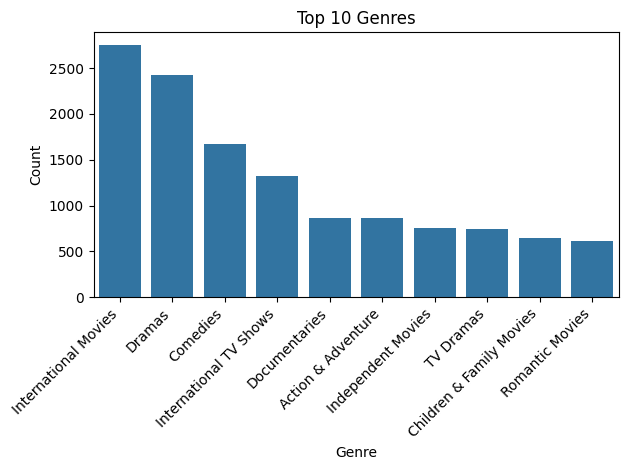

In [76]:
sns.barplot(data=genres_df,x='Genre',y='Count')
plt.xticks(rotation=45,ha='right')
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.tight_layout()